# analysis_d23b
Use functions in [**`d23b.py`**](d23b.py) to perform analysis and produce figures for _Modelling correlation between the ice-sheet components of sea level rise_.

Author: Benjamin S. Grandey, 2023–2024.

In [1]:
import datetime
import d23b
import matplotlib.pyplot as plt
from pathlib import Path
import time

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

## Relationship between sources of uncertainty and model-based projections
The schematic is produced separately using [**schematic_fig_d23b.pptx**](schematic_fig_d23b.pptx): first, export from PowerPoint to `fig01.pdf` (in `figs_d23b/f_pdf/`), then export `fig01.pdf` to `fig01.png` (in `figs_d23b/f_png/`).

In [3]:
# Are the .pdf and .png versions of the schematic more recent than the .pptx version?
schematic_pptx = Path('schematic_fig_d23b.pptx')
fig_name = f'fig{next(d23b.F_NUM):02}'  # name based on counter, then update counter (in prep for next fig)
schematic_pdf = Path(f'figs_d23b/f_pdf/{fig_name}.pdf')
schematic_png = Path(f'figs_d23b/f_png/{fig_name}.png')
for f in (schematic_pptx, schematic_pdf, schematic_png):
    try:
        print(f'{time.ctime(f.stat().st_mtime)}: {f.name}')
    except FileNotFoundError:
        print(f'Not found: {f.name}')

Wed May  3 11:15:29 2023: schematic_fig_d23b.pptx
Fri May 12 14:45:55 2023: fig01.pdf
Fri May 12 14:46:24 2023: fig01.png


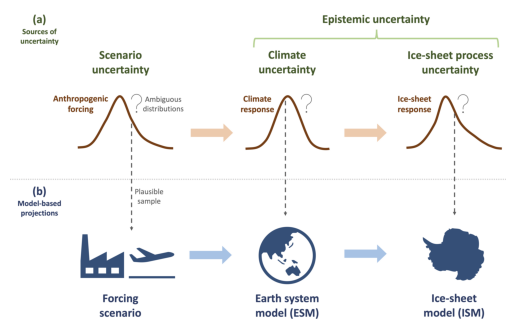

In [4]:
# Show schematic
plt.imshow(plt.imread(schematic_png))
plt.axis('off')
plt.show()

## Modelling marginals

read_ar6_samples(wf_1e, WAIS, ssp585, 2100): including PEN in WAIS
Written s01.pdf (0.03 MB)
Written s01.png (0.17 MB)


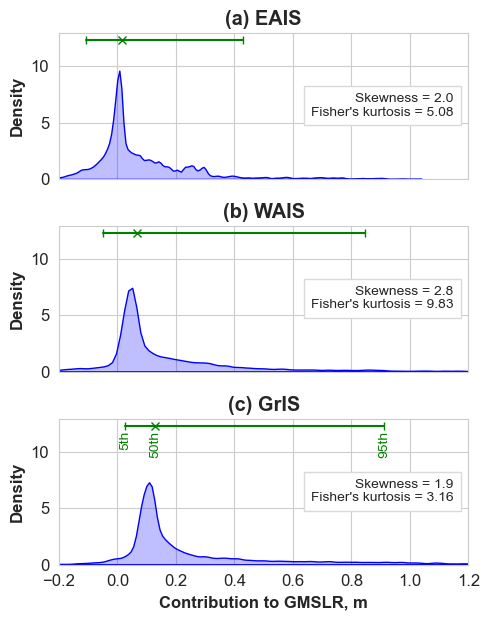

In [5]:
fig, _ = d23b.fig_component_marginals()
_ = d23b.name_save_fig(fig, fso='s')

## Modelling correlation

Written fig02.pdf (0.39 MB)
Written fig02.png (0.59 MB)


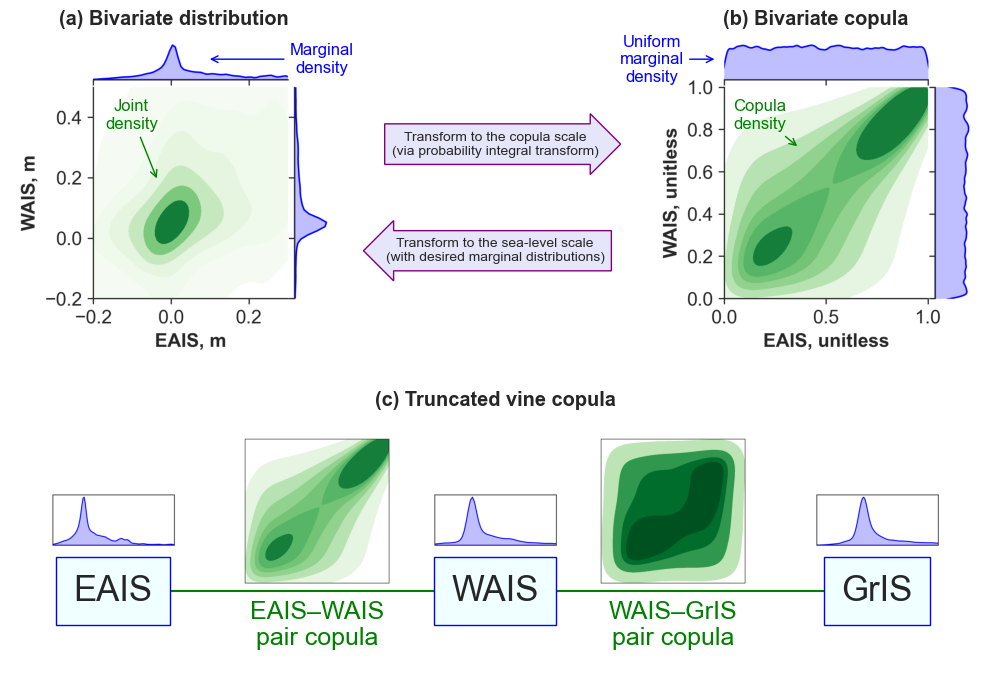

In [6]:
fig = d23b.fig_illustrate_copula()
_ = d23b.name_save_fig(fig, fso='f')

## Idealized correlation

Written fig03.pdf (0.03 MB)
Written fig03.png (0.32 MB)


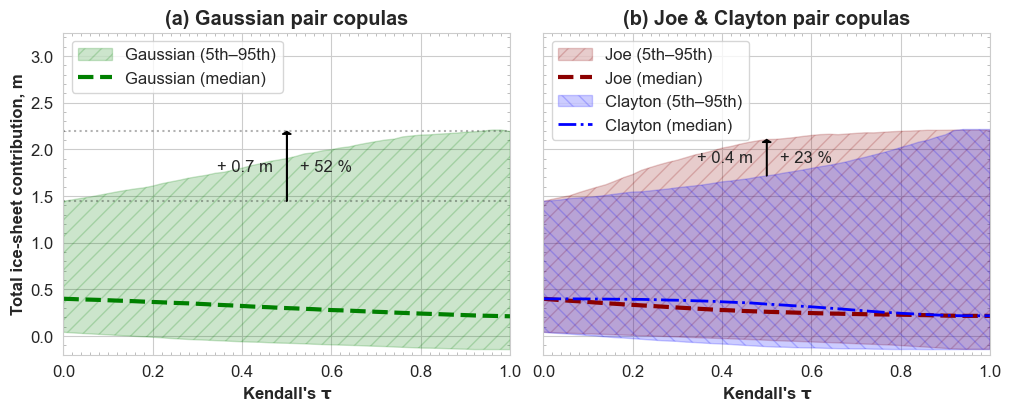

In [7]:
# Role of Kendall's tau and copula family
fig, axs = d23b.fig_total_vs_tau()
_ = d23b.name_save_fig(fig, fso='f')

read_ar6_samples(wf_1e, WAIS, ssp585, 2020): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2030): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2040): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2050): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2060): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2070): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2080): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2090): including PEN in WAIS
Written fig04.pdf (0.04 MB)
Written fig04.png (0.36 MB)


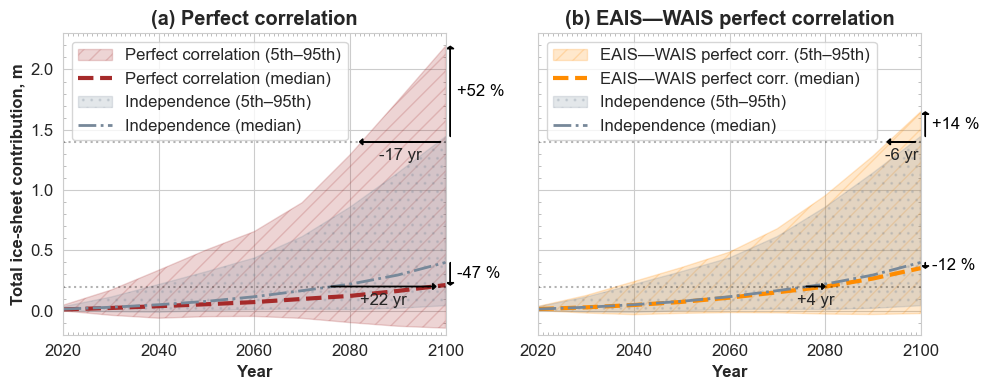

In [8]:
# Total vs time for perfect correlation, independence, and EAIS-WAIS perfect correlation
fig, axs = d23b.fig_total_vs_time(cop_workflows=('1', '10'))
_ = d23b.name_save_fig(fig, fso='f')

## Correlation from the AR6 workflow samples and the ISM ensemble

Written fig05.pdf (0.03 MB)
Written fig05.png (0.25 MB)


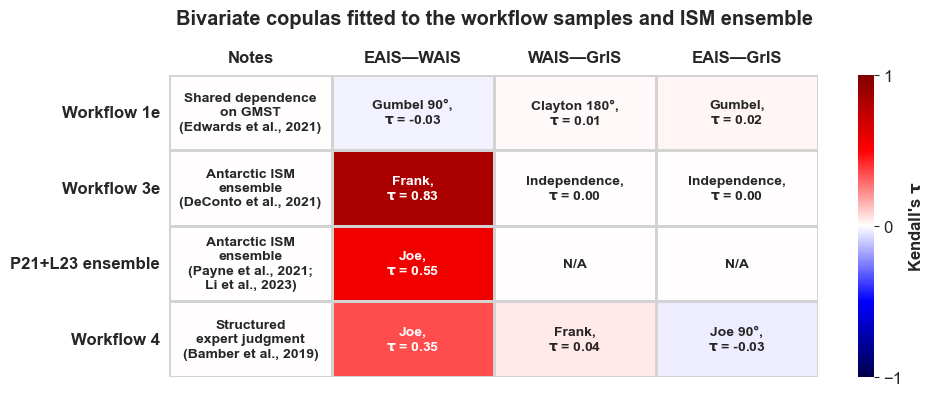

In [9]:
# Heatmap table of fitted bivariate copulas
fig, axs = d23b.fig_dependence_table()
_ = d23b.name_save_fig(fig, fso='f')

No WAIS-WAIS dependence found for P21+L23; using independence
Written fig06.pdf (0.05 MB)
Written fig06.png (0.63 MB)


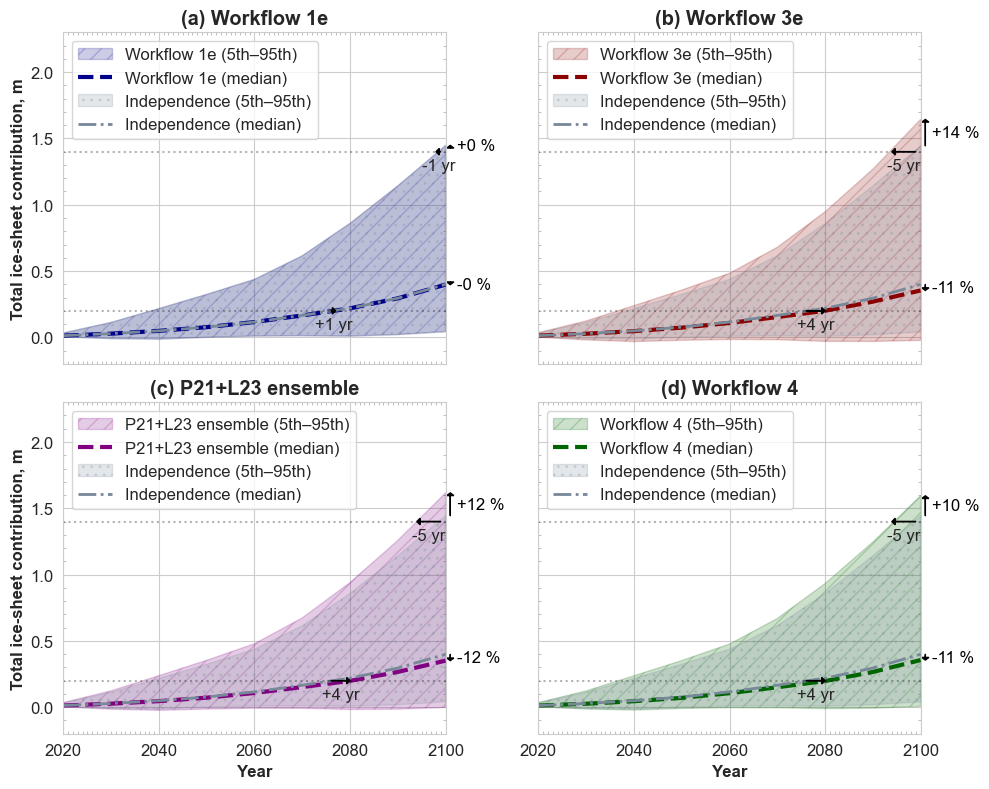

In [10]:
# Total vs time for four correlation structures
fig, axs = d23b.fig_total_vs_time()
_ = d23b.name_save_fig(fig, fso='f')

Written fig07.pdf (0.04 MB)
Written fig07.png (0.18 MB)


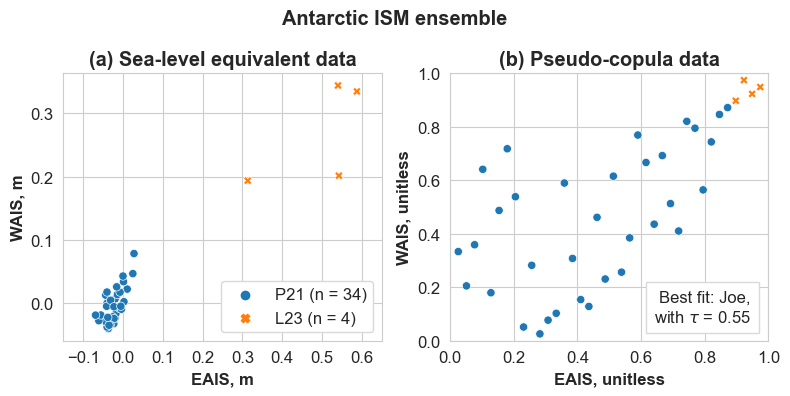

In [11]:
# ISM ensemble
fig, axs = d23b.fig_ism_ensemble()
_ = d23b.name_save_fig(fig, fso='f')

## Relative sea-level change

In [12]:
# GRD fingerprints for three locations
grd_df = d23b.get_grd_df()
grd_df.round(2)

,EAIS,WAIS,GrIS
REYKJAVIK,1.11,1.17,-1.70
DUBLIN,1.10,1.12,-0.04
TANJONG_PAGAR,1.11,1.14,1.12


Written fig08.pdf (0.04 MB)
Written fig08.png (0.30 MB)


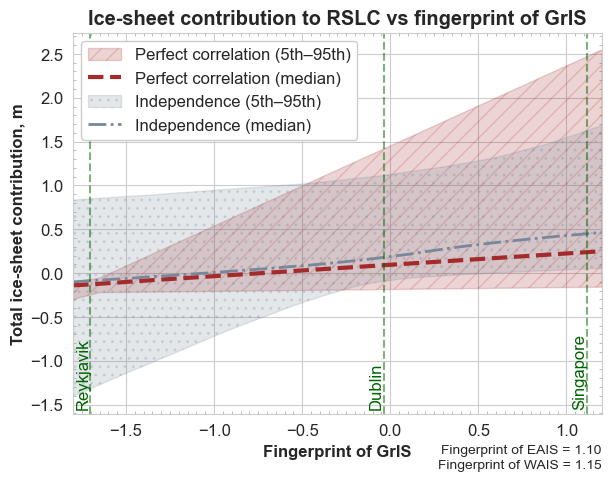

In [13]:
# Contribution to RSLC vs fingerprint of GrIS
fig, ax = plt.subplots(1, 1, figsize=(6, 4.7), constrained_layout=True)
ax = d23b.ax_sum_vs_gris_fingerprint(ax=ax)
_ = d23b.name_save_fig(fig, fso='f')

## Watermark and timing info

In [14]:
print(d23b.get_watermark())

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

matplotlib   : 3.7.1
numpy        : 1.24.3
pandas       : 2.0.2
pyvinecopulib: 0.6.3
scipy        : 1.10.1
seaborn      : 0.12.2
xarray       : 2023.5.0

conda environment: d23b-ice-dependence

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit


In [15]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2024-01-10 12:32:13
End:       2024-01-10 12:33:24
Wall time: 71 s
